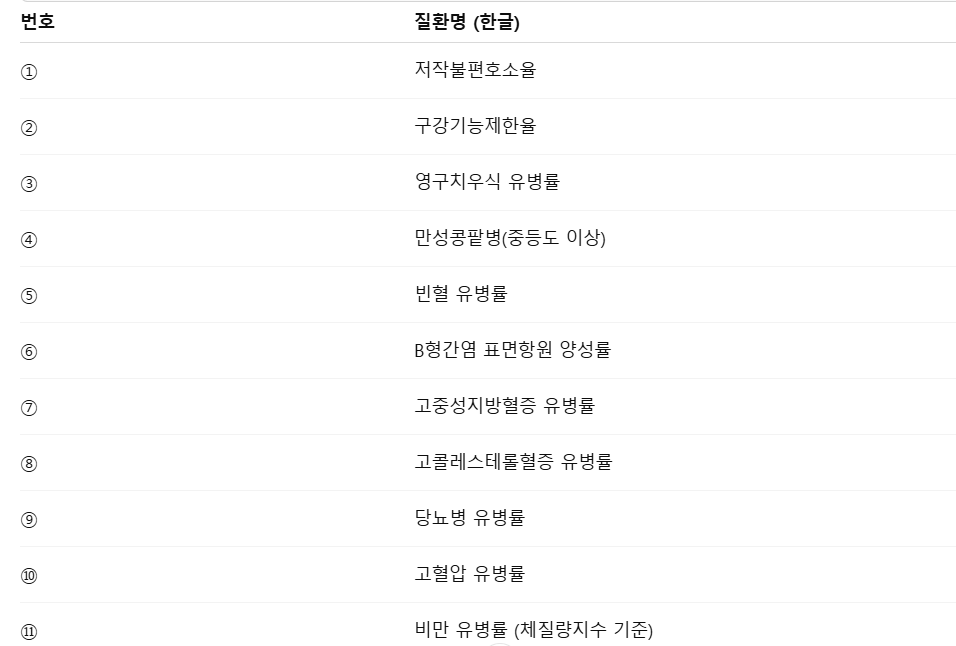

좌측에 사용된 숫자부터 내림차순

In [18]:
import numpy as np
from collections import Counter

# ✅ 1. 나이대별 유병률(%) 데이터 입력
age_group_data = {
    "20대": [5.3, 5.6, 30.8, 2.1, 4.9, 0.5, 5.2, 3.2, 1.7, 1.5, 31.0],
    "30대": [8.6, 8.6, 30.2, 2.8, 9.1, 1.2, 12.7, 12.7, 2.5, 6.2, 39.8],
    "40대": [9.9, 10.2, 24.1, 4.3, 11.6, 3.0, 14.0, 19.3, 7.7, 17.1, 37.7],
    "50대": [17.0, 19.6, 23.5, 9.2, 12.7, 2.9, 16.4, 36.7, 16.9, 33.7, 34.6],
    "60대": [22.2, 22.8, 19.8, 13.6, 17.0, 2.7, 14.7, 44.5, 24.2, 47.3, 31.4]
}

# ✅ 2. 시뮬레이션 함수 정의
def simulate_distribution(prob_list, sample_size=10000):
    samples = np.random.rand(sample_size, len(prob_list)) < prob_list
    counts = samples.sum(axis=1)
    result = Counter(counts)
    total = sum(result.values())
    return {k: round(v / total, 4) for k, v in sorted(result.items())}

# ✅ 3. 전체 나이대별 시뮬레이션 실행
for age, rates in age_group_data.items():
    probs = np.array(rates) / 100
    dist = simulate_distribution(probs)
    
    print(f"\n[{age}] 위험요인 개수 분포:")
    for k, v in dist.items():
        print(f"  - 위험요인 {k}개: {v*100:.2f}%")


[20대] 위험요인 개수 분포:
  - 위험요인 0개: 35.21%
  - 위험요인 1개: 42.43%
  - 위험요인 2개: 17.83%
  - 위험요인 3개: 4.05%
  - 위험요인 4개: 0.46%
  - 위험요인 5개: 0.02%

[30대] 위험요인 개수 분포:
  - 위험요인 0개: 20.99%
  - 위험요인 1개: 38.86%
  - 위험요인 2개: 27.27%
  - 위험요인 3개: 10.20%
  - 위험요인 4개: 2.37%
  - 위험요인 5개: 0.29%
  - 위험요인 6개: 0.02%

[40대] 위험요인 개수 분포:
  - 위험요인 0개: 17.18%
  - 위험요인 1개: 34.48%
  - 위험요인 2개: 28.79%
  - 위험요인 3개: 14.44%
  - 위험요인 4개: 4.17%
  - 위험요인 5개: 0.79%
  - 위험요인 6개: 0.13%
  - 위험요인 7개: 0.02%

[50대] 위험요인 개수 분포:
  - 위험요인 0개: 7.37%
  - 위험요인 1개: 23.26%
  - 위험요인 2개: 30.66%
  - 위험요인 3개: 22.45%
  - 위험요인 4개: 11.35%
  - 위험요인 5개: 3.86%
  - 위험요인 6개: 0.86%
  - 위험요인 7개: 0.16%
  - 위험요인 8개: 0.02%
  - 위험요인 9개: 0.01%

[60대] 위험요인 개수 분포:
  - 위험요인 0개: 4.01%
  - 위험요인 1개: 16.13%
  - 위험요인 2개: 28.42%
  - 위험요인 3개: 27.11%
  - 위험요인 4개: 15.82%
  - 위험요인 5개: 6.72%
  - 위험요인 6개: 1.45%
  - 위험요인 7개: 0.30%
  - 위험요인 8개: 0.03%
  - 위험요인 9개: 0.01%


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

# 1. 나이대별 유병률(%) 데이터
age_group_data = {
    "20대": [5.3, 5.6, 30.8, 2.1, 4.9, 0.5, 5.2, 3.2, 1.7, 1.5, 31.0],
    "30대": [8.6, 8.6, 30.2, 2.8, 9.1, 1.2, 12.7, 12.7, 2.5, 6.2, 39.8],
    "40대": [9.9, 10.2, 24.1, 4.3, 11.6, 3.0, 14.0, 19.3, 7.7, 17.1, 37.7],
    "50대": [17.0, 19.6, 23.5, 9.2, 12.7, 2.9, 16.4, 36.7, 16.9, 33.7, 34.6],
    "60대": [22.2, 22.8, 19.8, 13.6, 17.0, 2.7, 14.7, 44.5, 24.2, 47.3, 31.4]
}

# 2. 시뮬레이션 함수
def simulate_distribution(prob_list, sample_size=100000):
    samples = np.random.rand(sample_size, len(prob_list)) < prob_list
    counts = samples.sum(axis=1)
    result = Counter(counts)
    total = sum(result.values())
    return {k: round(v / total, 4) for k, v in sorted(result.items())}

# 3. 시뮬레이션 실행 후 결과 정리
result_rows = []
for age, rates in age_group_data.items():
    probs = np.array(rates) / 100
    dist = simulate_distribution(probs)
    for k in range(max(dist.keys()) + 1):
        result_rows.append({
            "연령대": age,
            "위험요인 개수": k,
            "비율(%)": round(dist.get(k, 0) * 100, 2)
        })

df_result = pd.DataFrame(result_rows)


In [16]:
# 4. 엑셀 파일로 저장
df_result.to_excel("연령대별_위험요인_개수_분포.xlsx", index=False)

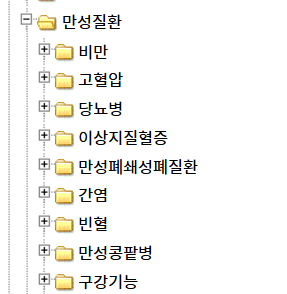

KOSIS 에서 20대,30대 데이터가 없는 만성폐쇄성폐질환을 제외한 11개의 만성질환에서 나이대별 유병률 발췌